In [1]:
import cv2
import os
import numpy as np
import pywt
import time
from math import floor
import matplotlib.pyplot as plt
from scipy.fftpack import dct, idct
from Utility import arnoldTransform, arnoldInverseTransform

(512, 512, 3)
Calculation time: 35.48407554626465 ms


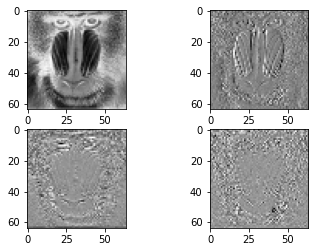

In [2]:
folder_path = "./imgs"
output_path = "./outputs"
os_path     = "./os_img"
# Perform augmentation for each image in the folder
for filename in os.listdir(folder_path):
    if filename.endswith(".jpg") or filename.endswith(".png"):
        # Load image
        img_path = os.path.join(folder_path, filename)
        ori_img = cv2.imread(img_path)
        img = cv2.cvtColor(ori_img, cv2.COLOR_BGR2YCrCb)
        Y_split = img[:,:,0]
        print(ori_img.shape)
        img1 = cv2.cvtColor(ori_img, cv2.COLOR_BGR2GRAY)
        outname = './outputs/'+'dwt_'+filename

        time_start=time.time()
        #LL,(HL,LH,HH) = pywt.dwt2(np.array(Y_split),'haar')
        coeffs = pywt.wavedec2(np.array(Y_split), wavelet='haar',level=3)
        LL, [LH3,HL3,HH3],[LH2,HL2,HH2],[LH1,HL1,HH1] = coeffs

        plt.subplot(2,2,1)
        plt.imshow(LL, cmap="Greys")
        plt.subplot(2,2,2)
        plt.imshow(HL3, cmap="Greys")
        plt.subplot(2,2,3)
        plt.imshow(LH3, cmap="Greys")
        plt.subplot(2,2,4)
        plt.imshow(HH3, cmap="Greys")

        time_end=time.time()
        print('Calculation time:', (time_end - time_start)*1000,'ms')
        cv2.imwrite(outname, np.uint8(LL))

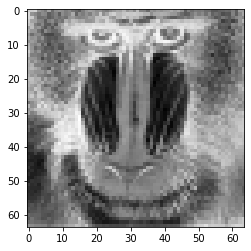

In [3]:
LL.shape
#print(np.array(LL)/np.mean(LL[:, :]))
plt.imshow(LL, cmap='Greys') 
plt.show()

In [4]:
# Convert LL3 of Y_componnet to DCT domain  
dct_img = cv2.dct(LL, cv2.DCT_ROWS)
print(dct_img)

[[ 6.63630215e+04  3.19425889e+02 -2.15356838e+03 ...  1.90708687e+02
   9.98986695e+01  6.27042353e+01]
 [-2.98481526e+03 -3.22531816e+03  2.33035421e+03 ... -1.44017569e+01
  -2.66037477e+01 -4.56141829e+01]
 [-9.45232513e+02  7.48369329e+02  5.22033425e+03 ...  1.00018233e+02
  -1.60707124e+01 -1.22499307e+02]
 ...
 [ 6.43457512e+01 -4.70639243e+01 -1.08816826e+02 ...  6.10598674e+01
   5.75380550e+00 -7.29428436e+00]
 [ 6.68999551e+01  1.03174673e+02 -9.69096795e+01 ... -4.94175626e+01
   3.30745428e+01 -7.22883608e+01]
 [-3.61103636e+01 -8.36407194e+01 -2.60621942e+01 ...  4.20580395e+00
   8.46018756e+00 -4.64085092e+01]]


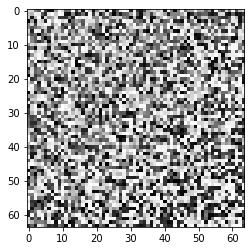

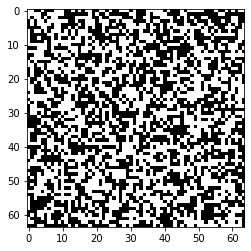

True

In [5]:
# convert to uint8
img1 = np.uint8(dct_img)
#print(img1)
# master share
ms_img = img1
plt.imshow(img1, cmap='Greys') 
plt.show()
for i in range(img1.shape[0]):
    for j in range(img1.shape[1]):
        if (img1[i][j] >= 128):
            ms_img[i][j] = 255
        else: 
            ms_img[i][j] = 0

plt.imshow(ms_img, cmap='Greys') 
plt.show()
outname = './ms_img/'+'ms_test.png'
cv2.imwrite(outname, ms_img)

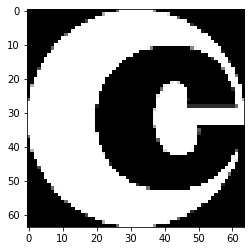

[[255 255 255 ... 255 255 255]
 [255 255 255 ... 255 255 255]
 [255 255 255 ... 255 255 255]
 ...
 [255 255 255 ... 255 255 255]
 [255 255 255 ... 255 255 255]
 [255 255 255 ... 255 255 255]]


In [6]:
wm_img = cv2.imread("./wms/wm.png", 0)
wm_img.shape
plt.imshow(wm_img, cmap='Greys') 
plt.show()
print(wm_img)

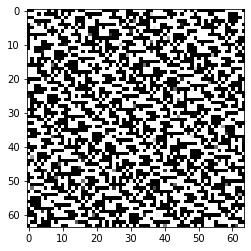

In [7]:
# arnoldTransform process
a = 6
b = 40
key = 33
wm_ar = arnoldTransform(wm_img, key)
wm_ar.shape
plt.imshow(wm_ar, cmap='Greys') 
plt.show()
#print(wm_ar)

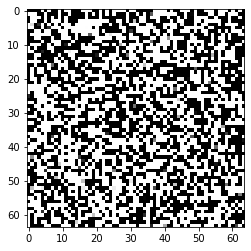

True

In [8]:
#zero-watermarking
#owner share (os) 
os_img = img1
for i in range(img1.shape[0]):
    for j in range(img1.shape[1]):
            os_img[i][j] = ms_img[i][j] ^ wm_ar[i][j]
            
plt.imshow(os_img, cmap='Greys') 
plt.show()        

outname = './os_img/'+'os_test.png'
cv2.imwrite(outname, os_img)

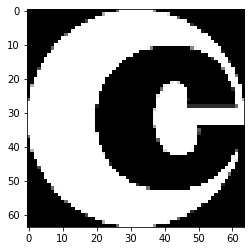

In [9]:
#Inverse arnoldTransform process
wm_ar_inv = arnoldInverseTransform(wm_ar, key)
wm_ar_inv.shape
plt.imshow(wm_ar_inv, cmap='Greys') 
plt.show()

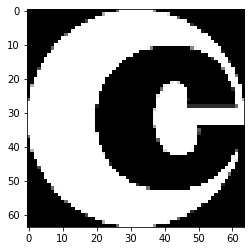

In [10]:
#Read MS, OS to create arnold image 
ms_img = cv2.imread("./ms_img/ms_test.png", 0)
os_img = cv2.imread("./os_img/os_test.png", 0)
wm_ar_xor = img1 
for i in range(img1.shape[0]):
    for j in range(img1.shape[1]):
            wm_ar_xor[i][j] = ms_img[i][j] ^ os_img[i][j]
            
wm_ar_inv1 = arnoldInverseTransform(wm_ar_xor, key)
wm_ar_inv1.shape
plt.imshow(wm_ar_inv1, cmap='Greys') 
plt.show()